In [1]:
cd "C:\Users\Lenovo\Downloads\ITMGT_25.03\Module 5\virtualenv"

C:\Users\Lenovo\Downloads\ITMGT_25.03\Module 5\virtualenv


In [2]:
import requests
import time
import matplotlib

#create an empty dataset
data = []

#loop 100 times every 10 secs
for i in range(100):
    #send get request to api link
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    
    #check if req was successful
    if response.status_code == 200:
        result = response.json()
        #extract timestamp, latitude, and longtitude
        timestamp = result["timestamp"]
        latitude = result["latitude"]
        longitude = result["longitude"]
        #appends tuple of the data to list "data" we made earlier
        data.append((timestamp, latitude, longitude))
        #just print it to make sure its getting it
        print(f"[{i+1}/100] Data point collected: {timestamp}, {latitude}, {longitude}")
    else:
        print(f"[{i+1}/100] Failed to fetch data. Status code: {response.status_code}")
        
    time.sleep(10) # wait 10 seconds before next ping

[1/100] Data point collected: 1751490525, 50.944703558884, 94.970447224386
[2/100] Data point collected: 1751490539, 50.764397480588, 96.312349701517
[3/100] Data point collected: 1751490554, 50.552729561916, 97.73764450741
[4/100] Data point collected: 1751490568, 50.338189960463, 99.055452029747
[5/100] Data point collected: 1751490582, 50.107528531142, 100.36046503854
[6/100] Data point collected: 1751490596, 49.861026326514, 101.65201584699
[7/100] Data point collected: 1751490610, 49.598978684979, 102.92948524533
[8/100] Data point collected: 1751490625, 49.301310095495, 104.28194616239
[9/100] Data point collected: 1751490639, 49.008043669889, 105.52854834558
[10/100] Data point collected: 1751490653, 48.700198242351, 106.75955323058
[11/100] Data point collected: 1751490668, 48.35456036456, 108.06075466765
[12/100] Data point collected: 1751490687, 47.893913839745, 109.68202723344
[13/100] Data point collected: 1751490702, 47.512730466152, 110.94034892017
[14/100] Data point col

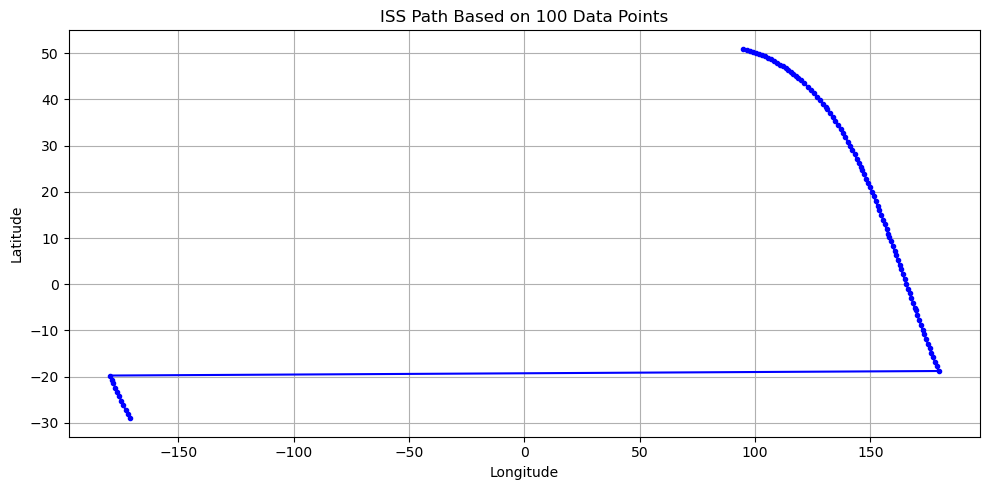

In [5]:
#import pyplot module from the matplotlib library, commonly given the alias plt
import matplotlib.pyplot as plt

#extract the list of tuples "data" into separate lists
timestamps = [point[0] for point in data]
latitudes = [point[1] for point in data]
longitudes = [point[2] for point in data]

#make the plot
plt.figure(figsize=(10, 5))
#make a small circle at each point,connect them with blue lines
plt.plot(longitudes, latitudes, marker='o', markersize=3, linestyle='-', color='blue')

#label the axes
plt.title("ISS Path Based on 100 Data Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#add grid or background
plt.grid(True)
plt.tight_layout()

#display the plot
plt.show()